# CS6103 Assignment 3
## Machine Learning Diagnosis of Rice Leaf Diseases with scikit-learn
#### Jaime Pang, John Chai (M20604)

## Problem Description
Plant diseases are one of the major factors that lead to decreased yield and quality in agricultural crops, spelling a huge problem for farmers and endangering their livelihoods. In order to prevent loss of crops to diseases, it is imperative that farmers are able to accurately diagnose plant diseases quickly and administer the requisite treatment so as to mitigate the damage done to crops. However, it is difficult to ensure a constant monitoring of crops and even so, farmers might not be able to identify a disease on sight due to lack of experience. But with the advent of machine learning and agricultural AI, it is now possible to automate the detection of such diseases so that farmers can more efficiently mitigate the damage done to their crops by plant diseases.

## Dataset and Objectives
A dataset of iamges of diseased rice leaves was obtained from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Rice+Leaf+Diseases. The dataset was collected by Dharmsinh Desai University, Gujarat, India, and features images of rice plants afflicted with 3 types of diseases: Bacterial leaf blight, Brown spot and Leaf smut (Top to bottom). 
Each category contains 40 images of leaves. Of each set of 40, 36 were used for training and 4 were used for testing.
<img src="training/Bacterial leaf blight/DSC_0365.JPG" width="300px"><img src="training/Brown spot/DSC_0100.JPG" width="300px"><img src="training/Leaf smut/DSC_0309.JPG" width="300px">
 
The model here aims to be able to take a image of a diseased leaf as an input, and predict its corresponding disease type based on these 3 diseases.

## Data preprocessing
Data needs to be processed first in order to eliminate any confounding variables in the images (e.g. brightness) that might confuse the training of the model and hinder the accuracy of predictions. Using skimage, the images are first cropped to 300 x 100 and the brightness is adjusted to standardise the colours of the background.

(897, 3081, 3)
0.7178912111770176


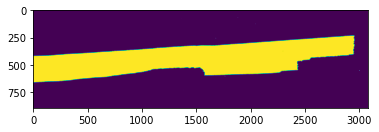

In [75]:
import skimage.exposure
import skimage.transform
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("training/Bacterial leaf blight/DSC_0365.JPG")

def exposure(img):
    #plt.imshow(imgg)
    #return skimage.exposure.adjust_log(imgg)
    return skimage.exposure.adjust_gamma(img, gamma=0.5,gain=1)

def resize(img):
    return skimage.transform.resize(img, [100,300])
    #https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio
    canny_edges = cv2.Canny(img,300,300)
    '''
    v = img.shape[0] # vertial pixels
    h = img.shape[1] # horizontal pixels 

    ver = int(h/2)
    cnt = []
    for i in range(canny_edges.shape[0]-ver):
        cnt.append(canny_edges[i:i+ver,:].sum()/255) # moving rectangle 

    cnt_arr = np.array(cnt)
    i = cnt_arr.argmax()

    Img_cropped = Image.fromarray(np.uint8(img[i:i+ver,:]))
    return Img_cropped
    '''
def deletebg(img):
    #use for getting rid of bg
    imgray = rgb2gray(img)
    thresh_val = threshold_mean(imgray)
    mask = np.where(imgray > thresh_val, 0, 1)
    print(img.shape)
    for i in range(len(img)):
        for j in range(len(img[0])):
            break

    print(thresh_val)

    return (mask)
    
plt.imshow(deletebg(img))

In [76]:
import sklearn
from sklearn import svm
from sklearn import datasets

#### Loading dataset

#load dataset
dataset = sklearn.datasets.load_files("training")
#https://scikit-learn.org/stable/tutorial/basic/tutorial.html


In [77]:
import skimage
from skimage import io

ic = io.imread_collection('training\*\*.jpg')
print(type(ic[0]))
y = np.asarray(40 * ['Bacterial leaf blight'] + 40 * ['Brown spot'] + 40 * ['Leaf smut'])
print((y))

<class 'numpy.ndarray'>
['Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'B

In [78]:
#Split into train and test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    ic,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

In [79]:
X_train = np.asarray(X_train)
print(len(X_train))
print(type(X_train))
y_train = np.asarray(y_train)

108
<class 'numpy.ndarray'>


#### Preprocessed dataset

(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)


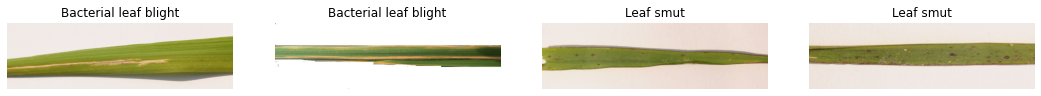

In [80]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    axes[i].axis('off')
    print(X_train[i].shape)
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])

In [92]:
#prep training data
from skimage.color import rgb2gray
from skimage import filters

def oned(img):
    imgg = rgb2gray(img)
    
    thresh_val = filters.threshold_yen(imgg)
    mask = np.where(imgg > thresh_val, 1, 0)
    #print(thresh_val)

    # Make sure the larger portion of the mask is considered background
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
    
    return mask

for i in range(len(X_train)):
    X_train[i] = oned(X_train[i])

0.4776239560355392
0.990685213694853
0.8483764414828431
0.34549470052083336
0.2079380438112745
0.813508314185049
0.3743120565257353
0.47795187959558827
0.49835924172794116
0.45480696231617646
0.8491934696691177
0.4127804511335785
0.6045068359375
0.4101413694852941
0.8272915088848039
0.3585362630208333
0.4191633218443628
0.3970414445465686
0.37080673177083334
0.344320168504902
0.38644079120710784
0.8681319041053922
0.3392514476102941
0.21526811351102942
0.8589497411151962
0.5444686251531863
0.7553857169117647
0.4726868144914216
0.870898534007353
0.3386810746017157
0.8633598085171569
0.28340133731617645
0.32706197074142157
0.41545598422181373
0.870129915747549
0.8965766574754901
0.4776143244485294
0.8535597418811274
0.3525733049938725
0.8689635945159313
0.33736312346813724
0.47136902343750003
0.35638677696078436
0.37771725337009804
0.8472245772058824
0.4731804664522059
0.4005873131127451
0.46756133118872556
0.8598670680147058
0.8322199456188726
0.3952144247855392
0.3139002504595588
0.331

#### Processed dataset

(897, 3081)
(897, 3081)
(897, 3081)
(897, 3081)


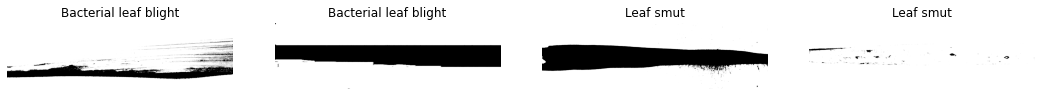

In [97]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    
    X_train[i] = rgb2gray(X_train[i])
    print(X_train[i].shape)
    axes[i].imshow(X_train[i], cmap='Greys')
    axes[i].set_title(y_train[i])
    
#is still broken but whatever

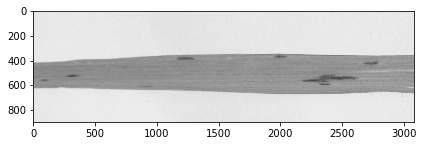

In [89]:
im_gray = rgb2gray(X_train[8])
io.imshow(im_gray)

from skimage import filters

thresh_val = filters.threshold_yen(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

print(thresh_val)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

plt.imshow(mask)

filters.try_all_threshold(im_gray)
#yen filter looks best

#use for getting rid of bg
from skimage.filters import threshold_mean
thresh_val = threshold_mean(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

print(thresh_val)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

plt.imshow(mask)

## Training

### Support Vector Machine (SVM)

In [102]:
#test
tt = X_train
for i in range(len(X_train)):
    tt[i] = X_train[i].reshape(-1)
print(tt[7])
print(tt.shape)
#print(y_train)

[0 1 0 ... 0 0 0]
(108,)


In [103]:
from sklearn import svm
clf = svm.SVC()
clf.fit(tt, y_train)

ValueError: setting an array element with a sequence.

In [ ]:
y_pred = clf.predict(X_test)

### Naive Bayes

### K Nearest Neighbours

## References
[1] https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

[2] https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

[3] https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio